In [48]:

import seaborn as sns
sns.set(style="darkgrid")

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 

from scipy import stats
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder


In [49]:
df = pd.read_csv('C:/censusincomedata.csv')

print(df.shape)

print(df.head())


(32561, 15)
   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-S

In [50]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [51]:
print(df.describe().T)

                  count           mean            std      min       25%  \
age             32561.0      38.581647      13.640433     17.0      28.0   
fnlwgt          32561.0  189778.366512  105549.977697  12285.0  117827.0   
education-num   32561.0      10.080679       2.572720      1.0       9.0   
capital-gain    32561.0    1077.648844    7385.292085      0.0       0.0   
capital-loss    32561.0      87.303830     402.960219      0.0       0.0   
hours-per-week  32561.0      40.437456      12.347429      1.0      40.0   

                     50%       75%        max  
age                 37.0      48.0       90.0  
fnlwgt          178356.0  237051.0  1484705.0  
education-num       10.0      12.0       16.0  
capital-gain         0.0       0.0    99999.0  
capital-loss         0.0       0.0     4356.0  
hours-per-week      40.0      45.0       99.0  


In [52]:
#unique values
for column_name in df.columns:
    print("{} unique values in the column".format(column_name))
    print("{}".format(df[column_name].unique()),"\n")

age unique values in the column
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87] 

workclass unique values in the column
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' NaN' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 

fnlwgt unique values in the column
[ 77516  83311 215646 ...  34066  84661 257302] 

education unique values in the column
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] 

education-num unique values in the column
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8] 

marital-status unique values in the column
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed'] 

In [53]:
#clearing missing values
df['native-country'] = df['native-country'].replace({'NaN'}, 'Unknown', regex=True)
df['occupation'] = df['occupation'].replace({'NaN'}, 'Unknown', regex=True)
df['workclass'] = df['workclass'].replace({'NaN'}, 'Unknown', regex=True)



In [54]:
#detection of outliers
numerical_cols = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']    

irq_score = {}

for c in numerical_cols:
    q1 = df[c].quantile(0.25)
    q3 = df[c].quantile(0.75)
    score = q3 - q1
    outliers = df[(df[c] < q1 - 1.5 * score) | (df[c] > q3 + 1.5 * score)][c]
    values = df[(df[c] >= q1 - 1.5 * score) | (df[c] <= q3 + 1.5 * score)][c]
    
    irq_score[c] = {
        "Q1": q1,
        "Q3": q3,
        "IRQ": score,
        "n_outliers": outliers.count(),
        "outliers_avg": outliers.mean(),
        "outliers_stdev": outliers.std(),
        "outliers_median": outliers.median(),
        "values_avg:": values.mean(),
        "values_stdev": values.std(),
        "values_median": values.median(),
    }
    
irq_score = pd.DataFrame.from_dict(irq_score, orient='index')

irq_score

#I did not delete outliers because deleting them would cause a lot of data loss

Q1        Q3       IRQ  n_outliers   outliers_avg  \
age                 28.0      48.0      20.0         143      83.930070   
fnlwgt          117827.0  237051.0  119224.0         992  512693.192540   
education-num        9.0      12.0       3.0        1198       3.313856   
capital-gain         0.0       0.0       0.0        2712   12938.541298   
capital-loss         0.0       0.0       0.0        1519    1871.428571   
hours-per-week      40.0      45.0       5.0        9008      37.487900   

                outliers_stdev  outliers_median    values_avg:   values_stdev  \
age                   4.398544             82.0      38.581647      13.640433   
fnlwgt           123361.148114         473086.5  189778.366512  105549.977697   
education-num         0.867105              4.0      10.080679       2.572720   
capital-gain      22395.413530           7298.0    1077.648844    7385.292085   
capital-loss        376.571535           1887.0      87.303830     402.960219   
hours-per-week       22.292067             30.0      40.437456      12.347429   

                values_median  
age                      37.0  
fnlwgt               178356.0  
education-num            10.0  
capital-gain              0.0  
capital-loss              0.0  
hours-per-week           40.0

Text(0, 0.5, 'Count')

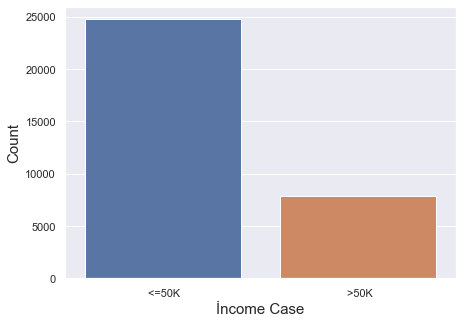

In [55]:
#data visualizations

#visualization for income case

plt.figure(figsize=(7,5))
sns.countplot(df["income"])
plt.xlabel("İncome Case",fontsize=15)
plt.ylabel("Count",fontsize=15)


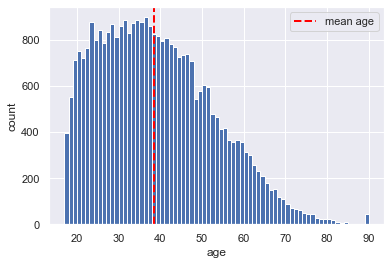

In [56]:
#visualization for numerical variables

ages = df['age'].hist(bins=max(df['age'])-min(df['age']))
mean_val = np.mean(df['age'])
plt.axvline(mean_val, linestyle='dashed', linewidth=2, color='red', label='mean age')
plt.xlabel('age')
plt.ylabel('count')
plt.legend()
plt.show()

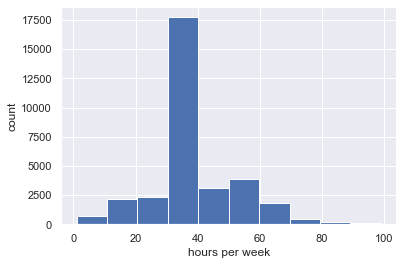

In [57]:
df['hours-per-week'].hist()
plt.xlabel('hours per week')
plt.ylabel('count')
plt.show()


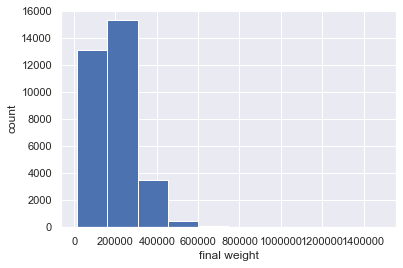

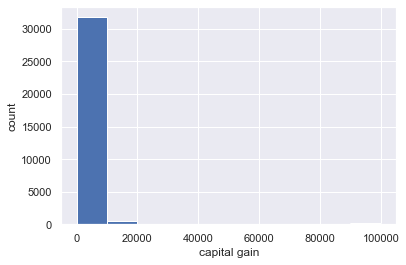

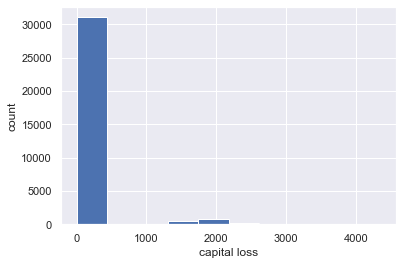

In [58]:
df['fnlwgt'].hist()
plt.xlabel('final weight')
plt.ylabel('count')
plt.show()

df["capital-gain"].hist()
plt.xlabel('capital gain')
plt.ylabel('count')
plt.show()

df["capital-loss"].hist()
plt.xlabel('capital loss')
plt.ylabel('count')
plt.show()


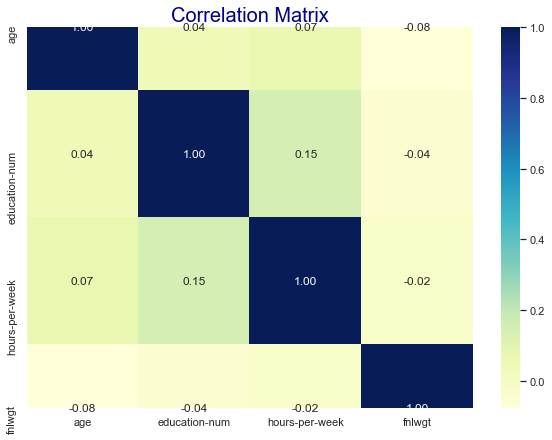

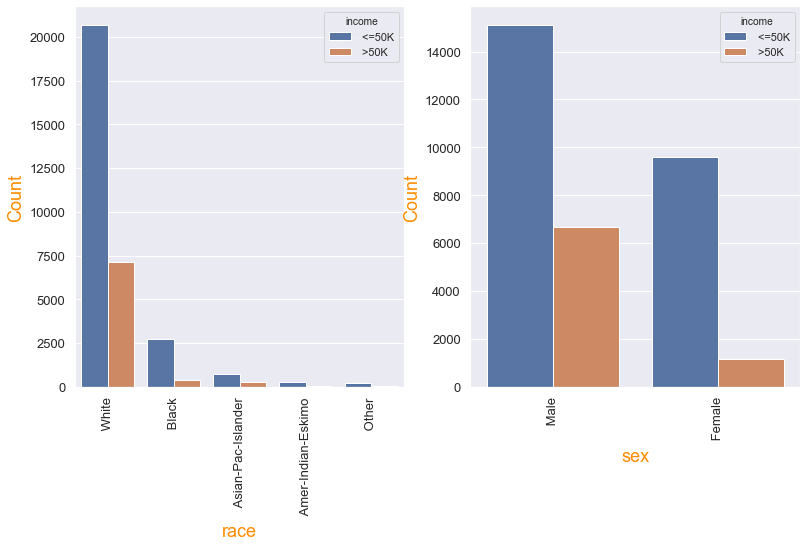

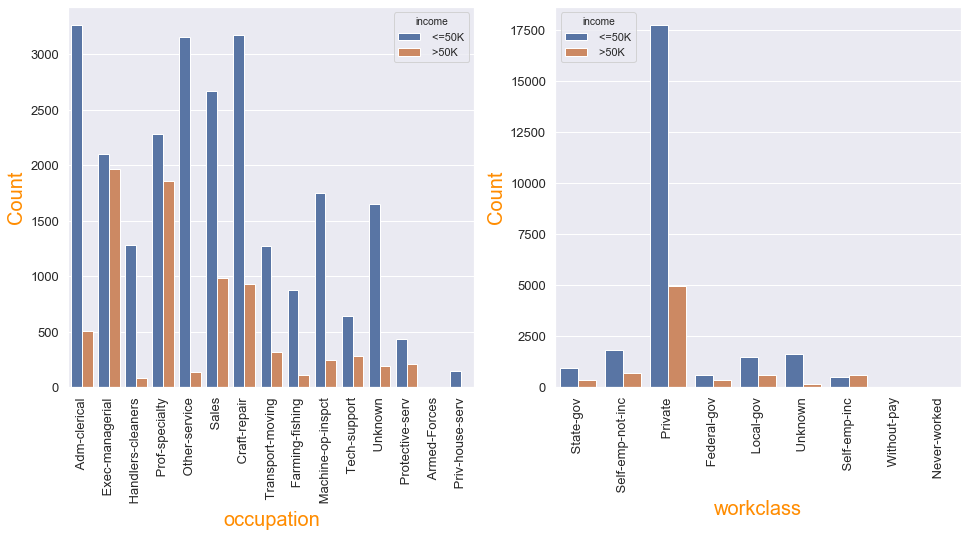

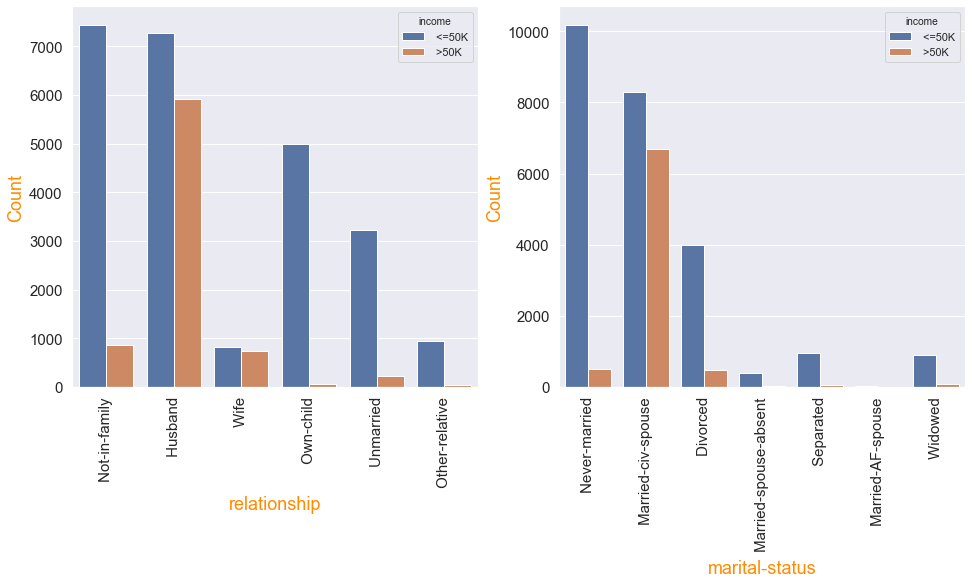

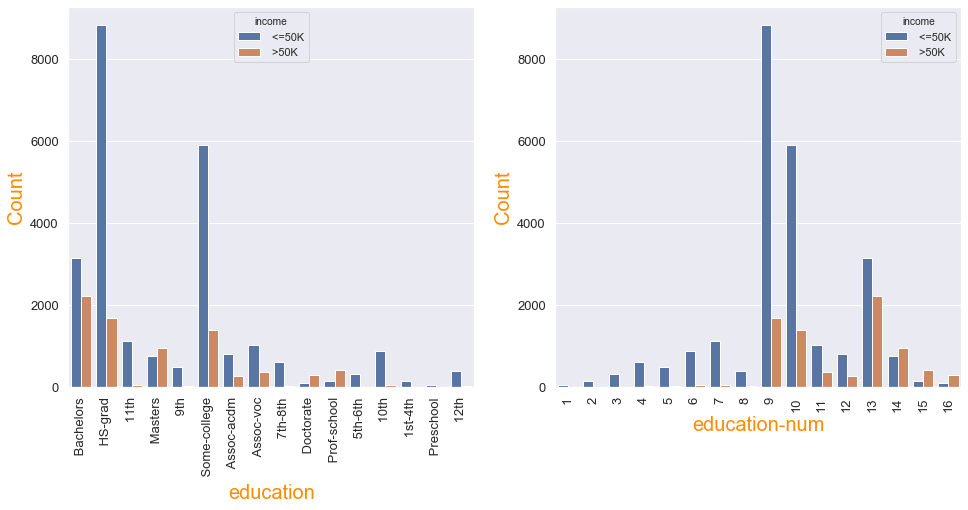

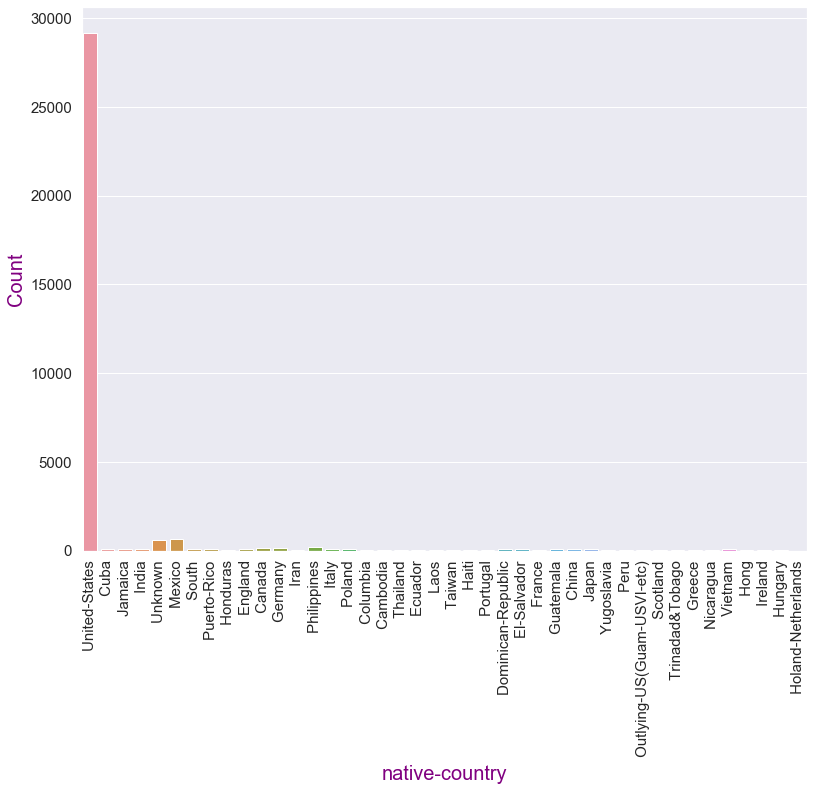

In [59]:
# Correlation matrix between numerical values
list=['age','education-num',"hours-per-week","fnlwgt"]

plt.figure(figsize=(10,7))
sns.heatmap(df[list].corr(),annot=True, fmt = ".2f", cmap = "YlGnBu")
plt.title("Correlation Matrix",color="darkblue",fontsize=20)
plt.show()

plt.figure(figsize=(13,7))


#Categorical Variables's Graphs by Count Plot about İncome

deg=["race","sex"]

for i in range(2):
    plt.subplot(1,2,i+1)
    sns.countplot(x=deg[i],data=df,hue='income')
    plt.xlabel(deg[i],color="darkorange",fontsize=18)
    plt.ylabel("Count",color="darkorange",fontsize=18)
    plt.yticks(fontsize=13)
    plt.xticks(rotation=90,fontsize=13)

plt.show()

plt.figure(figsize=(16,7))

deg=["occupation","workclass"]

for i in range(2):
    plt.subplot(1,2,i+1)
    sns.countplot(x=deg[i],data=df,hue="income")
    plt.xlabel(deg[i],color="darkorange",fontsize=20)
    plt.ylabel("Count",color="darkorange",fontsize=20)
    plt.yticks(fontsize=13)
    plt.xticks(rotation=90,fontsize=13)

plt.show()

plt.figure(figsize=(16,7))

deg = ["relationship","marital-status"]

for i in range(2):
    plt.subplot(1,2,i+1)
    sns.countplot(x=deg[i],data=df,hue="income")
    plt.xlabel(deg[i],color="darkorange",fontsize=18)
    plt.ylabel("Count",color="darkorange",fontsize=18)
    plt.xticks(rotation=90,fontsize=15)
    plt.yticks(fontsize=15)

plt.show()    

plt.figure(figsize=(16,7))

deg=["education","education-num"]

for i in range(2):
    plt.subplot(1,2,i+1)
    sns.countplot(x=deg[i],data=df,hue="income")
    plt.xlabel(deg[i],color="darkorange",fontsize=20)
    plt.ylabel("Count",color="darkorange",fontsize=20)
    plt.yticks(fontsize=13)
    plt.xticks(rotation=90,fontsize=13)

plt.show()
    
plt.figure(figsize=(13,10))
sns.countplot(x=df["native-country"],data=df)
plt.xlabel("native-country",color="purple",fontsize=20)
plt.ylabel("Count",color="purple",fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [60]:
#Data Conversion

df1 = pd.get_dummies(df["workclass"])
df2 = pd.get_dummies(df["education"])
df3 = pd.get_dummies(df["marital-status"])
df4 = pd.get_dummies(df["occupation"])
df5 = pd.get_dummies(df["relationship"])
df6 = pd.get_dummies(df["race"])
df7= pd.get_dummies(df["sex"])
df8 = pd.get_dummies(df["native-country"])

encoder= LabelEncoder()
df['income'] = encoder.fit_transform(df['income'].astype('str'))

df  = pd.concat([df,df1,df2,df3,df4,df5,df6,df7,df8],axis=1)
df.drop(['native-country','workclass',"education","marital-status",
         "occupation","relationship","race","sex"],axis=1, inplace=True)   
print(df.head())

   age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

   income   Federal-gov   Local-gov   Never-worked  ...   Puerto-Rico  \
0       0             0           0              0  ...             0   
1       0             0           0              0  ...             0   
2       0             0           0              0  ...             0   
3       0             0           0              0  ...             0   
4       0             0           0              0  ...             0   

    Scotland   South   Taiwan   Thailand   Trinadad&Tobago   United-States  \
0          0       0

In [61]:

from sklearn.model_selection import cross_val_predict, KFold
from sklearn.preprocessing import StandardScaler

#standardization

X = StandardScaler().fit_transform(df.loc[:, df.columns != 'income'])
Y = df['income']

kf = KFold(n_splits=5, shuffle=True, random_state=42)



In [62]:
#application of models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from mlxtend.plotting import plot_confusion_matrix


In [63]:
tree = DecisionTreeClassifier(criterion="gini")
pred = cross_val_predict(tree, X, Y, cv=kf)
print("DecisionTreeClassifier")
print("Accuracy score:", round(accuracy_score(Y, pred), 4), '\n')



DecisionTreeClassifier
Accuracy score: 0.8152 



KNeighborsClassifier
Accuracy score: 0.8243 

Best Parameters: {'n_neighbors': 15}
Best Score: 0.8308098645618992
Best KNN Classifier
Accuracy score: 0.8308 

              precision    recall  f1-score   support

           0       0.87      0.92      0.89     24720
           1       0.68      0.56      0.61      7841

    accuracy                           0.83     32561
   macro avg       0.77      0.74      0.75     32561
weighted avg       0.82      0.83      0.82     32561



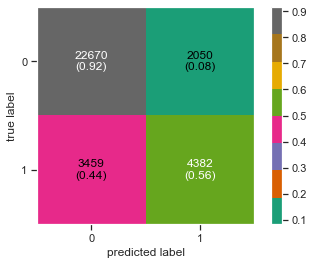

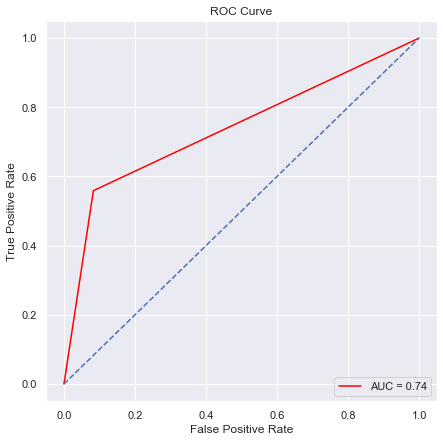

In [64]:
knn=KNeighborsClassifier()
pred = cross_val_predict(knn, X, Y, cv=kf)

print("KNeighborsClassifier")
print("Accuracy score:", round(accuracy_score(Y, pred), 4), '\n')

knn_params = {'n_neighbors':[10,15,20,25,30]}

knn_grid = GridSearchCV(knn, knn_params,
                         cv=kf)

knn_grid.fit(X, Y)

print('Best Parameters: {}'.format(knn_grid.best_params_))
print('Best Score: {}'.format(knn_grid.best_score_))

knn_best=knn=KNeighborsClassifier(n_neighbors=15)
pred = cross_val_predict(knn_best, X, Y, cv=kf)

print("Best KNN Classifier")
print("Accuracy score:", round(accuracy_score(Y, pred), 4), '\n')
print(classification_report(Y, pred))

cms=confusion_matrix(Y, pred)
fig, ax = plot_confusion_matrix(conf_mat=cms,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                cmap = 'Dark2')
plt.show()


false_positive_rate, true_positive_rate, thresholds = roc_curve(Y, pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

plt.figure(figsize=(7,7))
plt.title('ROC Curve')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


Best Parameters: {'max_leaf_nodes': 128, 'min_impurity_decrease': 0.0001, 'min_samples_leaf': 40, 'min_samples_split': 160}
Best Score: 0.8584502932956605
Best Decision Tree Classifier
Accuracy score: 0.8585 

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     24720
           1       0.76      0.60      0.67      7841

    accuracy                           0.86     32561
   macro avg       0.82      0.77      0.79     32561
weighted avg       0.85      0.86      0.85     32561



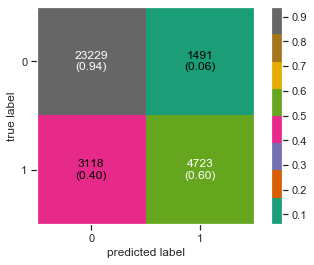

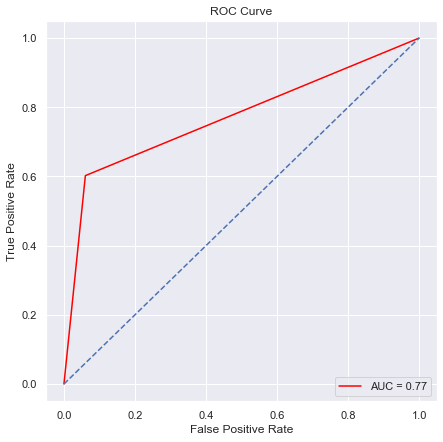

In [65]:

tree_params = {'max_leaf_nodes':[8,16,32,64,128],
               'min_impurity_decrease':[0.0001,0.001,0.1,0.2],'min_samples_split':[40,80,160,320],'min_samples_leaf':[40,80,160,320]}

tree_grid = GridSearchCV(tree, tree_params,
                         cv=kf)

tree_grid.fit(X, Y)


print('Best Parameters: {}'.format(tree_grid.best_params_))
print('Best Score: {}'.format(tree_grid.best_score_))


tree_best = DecisionTreeClassifier(criterion="gini",max_leaf_nodes=128, min_impurity_decrease= 0.0001, min_samples_leaf=40, min_samples_split=160)
pred = cross_val_predict(tree_best, X, Y, cv=kf)

print("Best Decision Tree Classifier")
print("Accuracy score:", round(accuracy_score(Y, pred), 4), '\n')
print(classification_report(Y, pred))

cms=confusion_matrix(Y, pred)
fig, ax = plot_confusion_matrix(conf_mat=cms,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                cmap = 'Dark2')
plt.show()


false_positive_rate, true_positive_rate, thresholds = roc_curve(Y, pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

plt.figure(figsize=(7,7))
plt.title('ROC Curve')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



AdaBoostClassifier
Accuracy score: 0.8592 

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     24720
           1       0.76      0.61      0.68      7841

    accuracy                           0.86     32561
   macro avg       0.82      0.77      0.79     32561
weighted avg       0.85      0.86      0.85     32561



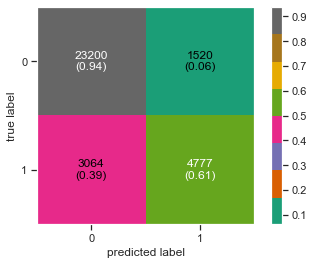

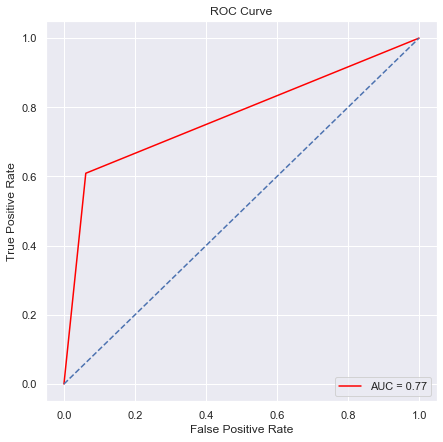

GradientBoostingClassifier
Accuracy score: 0.8658 

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     24720
           1       0.79      0.60      0.68      7841

    accuracy                           0.87     32561
   macro avg       0.84      0.78      0.80     32561
weighted avg       0.86      0.87      0.86     32561



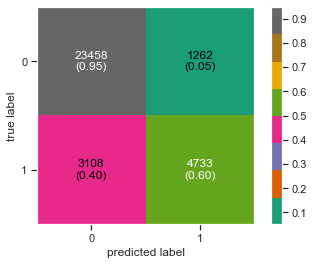

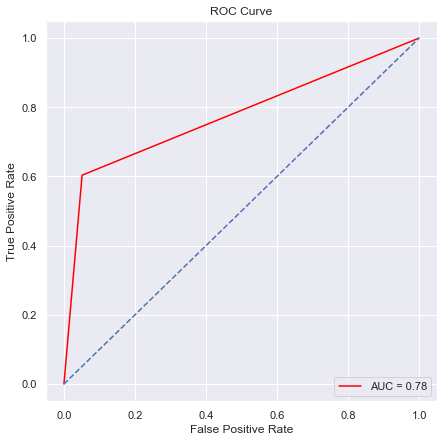

RandomForestClassifier


C:\Users\ASUS\Anaconda3.3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ASUS\Anaconda3.3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ASUS\Anaconda3.3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ASUS\Anaconda3.3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ASUS\Anaconda3.3\lib\site-packages\sklearn\ensemble\forest.py:2

Accuracy score: 0.8483 

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     24720
           1       0.73      0.59      0.65      7841

    accuracy                           0.85     32561
   macro avg       0.80      0.76      0.78     32561
weighted avg       0.84      0.85      0.84     32561



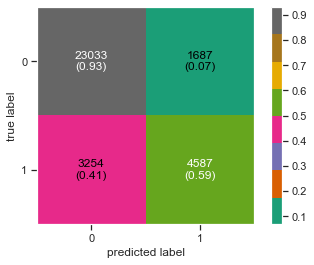

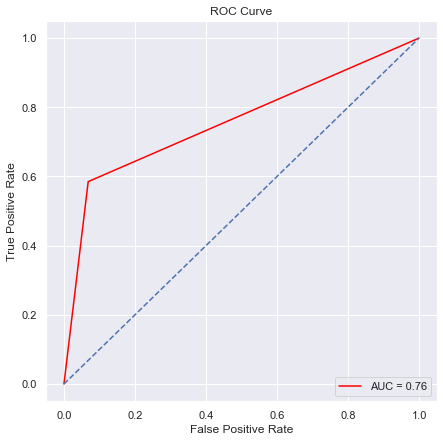

CatBoostClassifier
Learning rate set to 0.042149
0:	learn: 0.6514906	total: 23.3ms	remaining: 23.3s
1:	learn: 0.6136758	total: 38ms	remaining: 19s
2:	learn: 0.5793469	total: 64.7ms	remaining: 21.5s
3:	learn: 0.5517710	total: 79ms	remaining: 19.7s
4:	learn: 0.5255844	total: 92.4ms	remaining: 18.4s
5:	learn: 0.5056219	total: 106ms	remaining: 17.5s
6:	learn: 0.4844897	total: 119ms	remaining: 16.8s
7:	learn: 0.4653682	total: 132ms	remaining: 16.4s
8:	learn: 0.4484306	total: 145ms	remaining: 16s
9:	learn: 0.4342627	total: 158ms	remaining: 15.7s
10:	learn: 0.4223061	total: 171ms	remaining: 15.4s
11:	learn: 0.4119487	total: 188ms	remaining: 15.5s
12:	learn: 0.4025137	total: 202ms	remaining: 15.4s
13:	learn: 0.3941161	total: 216ms	remaining: 15.2s
14:	learn: 0.3885338	total: 229ms	remaining: 15.1s
15:	learn: 0.3823322	total: 243ms	remaining: 14.9s
16:	learn: 0.3762399	total: 256ms	remaining: 14.8s
17:	learn: 0.3712907	total: 270ms	remaining: 14.7s
18:	learn: 0.3669481	total: 283ms	remaining: 1

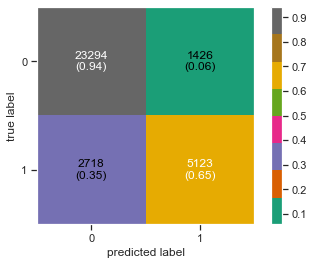

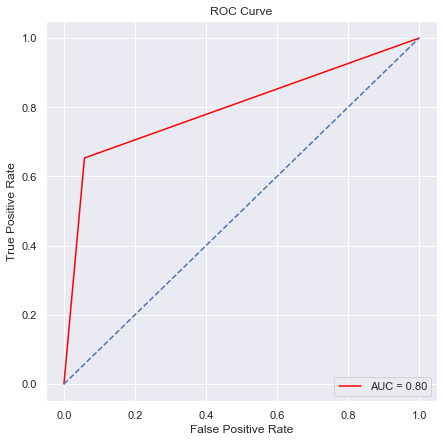

In [66]:

classifiers = [
   
    AdaBoostClassifier(),
    GradientBoostingClassifier(), 
    RandomForestClassifier(),
    CatBoostClassifier(),
    ]


for i, c in enumerate(classifiers):
    
    x_axs = i%2
    y_axs = int(i/2)
    # print(c)
    print(type(c).__name__)
    pred = cross_val_predict(c, X, Y, cv=kf)
    print("Accuracy score:", round(accuracy_score(Y, pred), 4), '\n')
    print(classification_report(Y, pred))
    
    cm=confusion_matrix(Y, pred)
    fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                cmap = 'Dark2')
    plt.show()


    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y, pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    roc_auc

    plt.figure(figsize=(7,7))
    plt.title('ROC Curve')
    plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()



MLPClassifier
Accuracy score: 0.8513 

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     24720
           1       0.74      0.58      0.65      7841

    accuracy                           0.85     32561
   macro avg       0.81      0.76      0.78     32561
weighted avg       0.84      0.85      0.84     32561



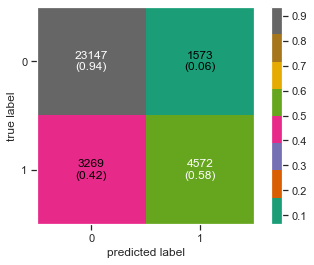

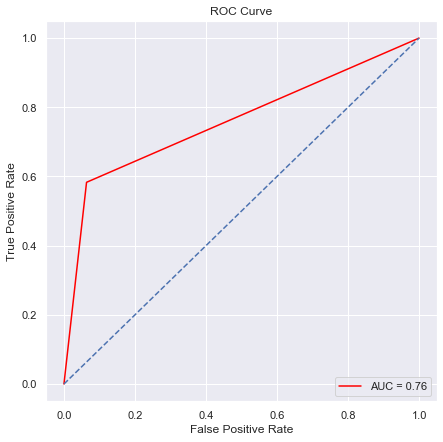

KNeighborsClassifier
Accuracy score: 0.8303 

              precision    recall  f1-score   support

           0       0.87      0.92      0.89     24720
           1       0.68      0.56      0.61      7841

    accuracy                           0.83     32561
   macro avg       0.77      0.74      0.75     32561
weighted avg       0.82      0.83      0.82     32561



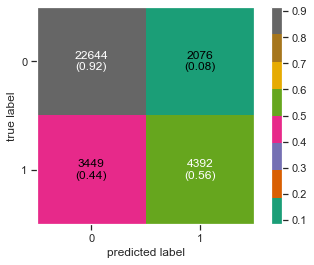

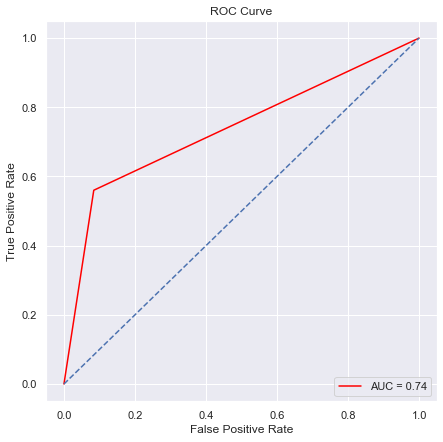

In [67]:
classifiers = [
    
    MLPClassifier(hidden_layer_sizes=(50,50,50), activation='identity',max_iter=200),
    KNeighborsClassifier(n_neighbors=17,weights='distance')
]


for i, c in enumerate(classifiers):
    
    x_axs = i%2
    y_axs = int(i/2)
    
    # print(c)
    print(type(c).__name__)
    pred = cross_val_predict(c, X, Y, cv=kf)
    print("Accuracy score:", round(accuracy_score(Y, pred), 4), '\n')
    print(classification_report(Y, pred))
    
    cm=confusion_matrix(Y, pred)
    fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                cmap = 'Dark2')
    plt.show()


    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y, pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    roc_auc

    plt.figure(figsize=(7,7))
    plt.title('ROC Curve')
    plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    
   


In [68]:
#optimisation of catboost algorithm with gridsearch

from sklearn.model_selection import GridSearchCV

params = { 
        'max_depth': [4,5,6,7,8,9,10],
          }

classifier = CatBoostClassifier()

grid = GridSearchCV(classifier, param_grid=params, cv=kf)
search_result = grid.fit(X, Y)

# GridSearch results
means = search_result.cv_results_['mean_test_score']
params = search_result.cv_results_['params']
for m, p in zip(means, params):
    print(f"{m} with: {p}")

Learning rate set to 0.042149
0:	learn: 0.6533712	total: 11.4ms	remaining: 11.4s
1:	learn: 0.6162052	total: 22.1ms	remaining: 11.1s
2:	learn: 0.5848598	total: 33ms	remaining: 11s
3:	learn: 0.5578933	total: 43.7ms	remaining: 10.9s
4:	learn: 0.5315942	total: 54.4ms	remaining: 10.8s
5:	learn: 0.5116905	total: 63.7ms	remaining: 10.5s
6:	learn: 0.4937582	total: 73.7ms	remaining: 10.4s
7:	learn: 0.4770488	total: 91.3ms	remaining: 11.3s
8:	learn: 0.4622139	total: 103ms	remaining: 11.3s
9:	learn: 0.4498811	total: 114ms	remaining: 11.3s
10:	learn: 0.4387041	total: 124ms	remaining: 11.2s
11:	learn: 0.4287946	total: 135ms	remaining: 11.1s
12:	learn: 0.4203815	total: 145ms	remaining: 11s
13:	learn: 0.4111579	total: 155ms	remaining: 10.9s
14:	learn: 0.4060659	total: 164ms	remaining: 10.8s
15:	learn: 0.3987634	total: 175ms	remaining: 10.8s
16:	learn: 0.3946524	total: 188ms	remaining: 10.9s
17:	learn: 0.3902126	total: 201ms	remaining: 10.9s
18:	learn: 0.3869077	total: 220ms	remaining: 11.3s
19:	learn

0:	learn: 0.6631297	total: 13.9ms	remaining: 13.9s
1:	learn: 0.6348573	total: 27.4ms	remaining: 13.7s
2:	learn: 0.6081658	total: 40.5ms	remaining: 13.5s
3:	learn: 0.5858218	total: 53.7ms	remaining: 13.4s
4:	learn: 0.5638382	total: 67.4ms	remaining: 13.4s
5:	learn: 0.5462805	total: 80.5ms	remaining: 13.3s
6:	learn: 0.5272854	total: 94.1ms	remaining: 13.4s
7:	learn: 0.5091908	total: 107ms	remaining: 13.3s
8:	learn: 0.4945645	total: 121ms	remaining: 13.3s
9:	learn: 0.4799532	total: 135ms	remaining: 13.4s
10:	learn: 0.4672093	total: 148ms	remaining: 13.3s
11:	learn: 0.4544906	total: 162ms	remaining: 13.3s
12:	learn: 0.4442453	total: 175ms	remaining: 13.3s
13:	learn: 0.4346622	total: 189ms	remaining: 13.3s
14:	learn: 0.4249164	total: 202ms	remaining: 13.3s
15:	learn: 0.4185548	total: 226ms	remaining: 13.9s
16:	learn: 0.4125986	total: 249ms	remaining: 14.4s
17:	learn: 0.4065578	total: 273ms	remaining: 14.9s
18:	learn: 0.4010232	total: 287ms	remaining: 14.8s
19:	learn: 0.3945543	total: 308ms	

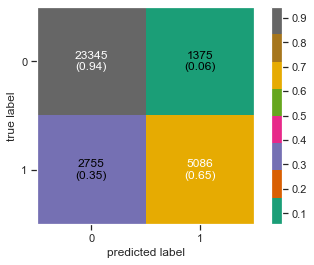

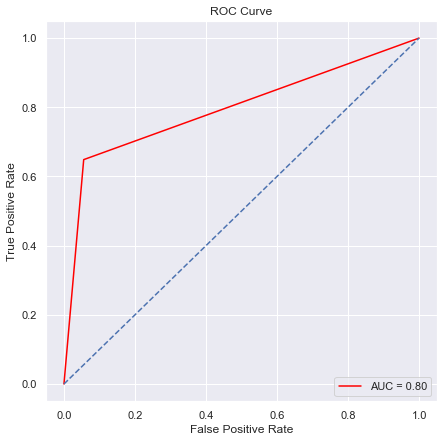

In [69]:
CBC=CatBoostClassifier(learning_rate=0.03)
pred = cross_val_predict(CBC, X, Y, cv=kf)
cm=confusion_matrix(Y, pred)
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                cmap = 'Dark2')
plt.show()


false_positive_rate, true_positive_rate, thresholds = roc_curve(Y, pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

plt.figure(figsize=(7,7))
plt.title('ROC Curve')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


0:	learn: 0.6671965	total: 29.1ms	remaining: 29.1s
1:	learn: 0.6428824	total: 56.7ms	remaining: 28.3s
2:	learn: 0.6186556	total: 83.5ms	remaining: 27.8s
3:	learn: 0.5974755	total: 117ms	remaining: 29s
4:	learn: 0.5797606	total: 143ms	remaining: 28.5s
5:	learn: 0.5645994	total: 177ms	remaining: 29.3s
6:	learn: 0.5484684	total: 204ms	remaining: 28.9s
7:	learn: 0.5347016	total: 231ms	remaining: 28.7s
8:	learn: 0.5212663	total: 267ms	remaining: 29.4s
9:	learn: 0.5087425	total: 313ms	remaining: 31s
10:	learn: 0.4998866	total: 341ms	remaining: 30.6s
11:	learn: 0.4903486	total: 367ms	remaining: 30.2s
12:	learn: 0.4818181	total: 400ms	remaining: 30.4s
13:	learn: 0.4741842	total: 427ms	remaining: 30.1s
14:	learn: 0.4661317	total: 466ms	remaining: 30.6s
15:	learn: 0.4595424	total: 501ms	remaining: 30.8s
16:	learn: 0.4527398	total: 542ms	remaining: 31.3s
17:	learn: 0.4463307	total: 579ms	remaining: 31.6s
18:	learn: 0.4402447	total: 609ms	remaining: 31.4s
19:	learn: 0.4349518	total: 646ms	remainin

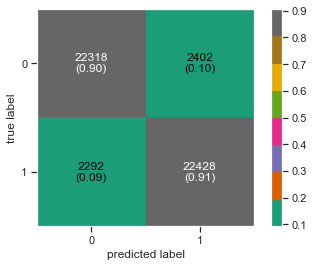

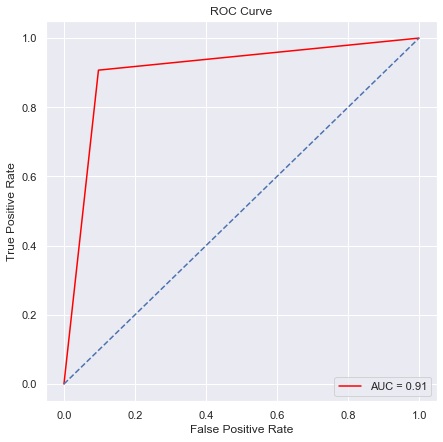

In [70]:
#implementation of catboost with balanced data set. 
#We see that better results have been achieved with the balanced data set

from imblearn.over_sampling import SMOTE


sm = SMOTE(random_state=27,ratio = 1.0)
X_smote, Y_smote = sm.fit_sample(X,Y)

CBC=CatBoostClassifier(learning_rate=0.03)
pred = cross_val_predict(CBC, X_smote, Y_smote, cv=kf)
print("Cat Boost Classifier with Smote ")
print("Accuracy score:", round(accuracy_score(Y_smote, pred), 4), '\n')
print(confusion_matrix(Y_smote, pred))
print(classification_report(Y_smote, pred))

cms=confusion_matrix(Y_smote, pred)
fig, ax = plot_confusion_matrix(conf_mat=cms,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                cmap = 'Dark2')
plt.show()


false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_smote, pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

plt.figure(figsize=(7,7))
plt.title('ROC Curve')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
